# LAB 2
--------------------------------------------------------------------------------
# Name : Vedant R Landge
# PRN : 20190802005
# ADVANCED AI


##PART A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sympy
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from scipy import misc

In [2]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2grey, rgb2yuv, grey2rgb
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from PIL import Image
import scipy
from scipy.fftpack import fft, dct

In [3]:
image = imread('Vegetable Image.png')

In [4]:
image.shape

(477, 692, 4)

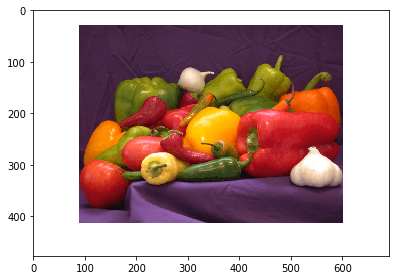

In [5]:
imshow(image)

In [6]:
grey_image = rgb2grey(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)


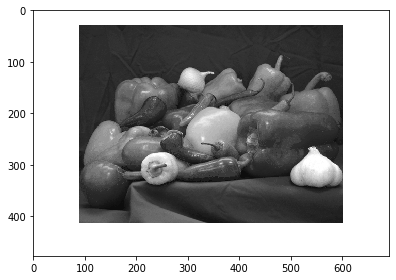

In [7]:
imshow(grey_image)

### DFT (Discrete Fourier Transformation)

In [8]:
grey_fourier = scipy.fft.fftn(grey_image)
grey_fourier = scipy.fft.fftshift(grey_fourier)

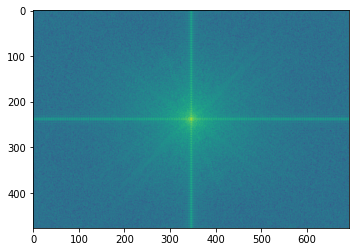

In [9]:
plt.figure(num=None, figsize=(6, 4))
plt.imshow(np.log(abs(grey_fourier)))

In [10]:
dft_image = abs(np.fft.ifft2(grey_fourier))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: grey2rgb is deprecated. It will be removed in version 0.19.Please use gray2rgb instead.
  """Entry point for launching an IPython kernel.


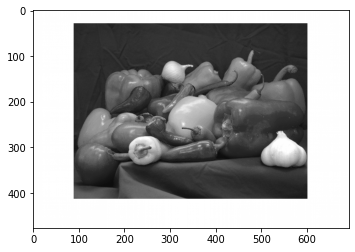

In [11]:
dft_image = grey2rgb(dft_image)
plt.imshow(dft_image)

### DCT (Discrete Cosine Transformation)

In [12]:
dct_image = scipy.fft.dct(grey_image, type=3)

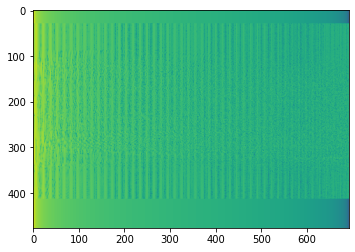

In [13]:
plt.figure(num=None, figsize=(6, 4))
plt.imshow(np.log(abs(dct_image)))

In [14]:
idct_image = scipy.fft.idct(dct_image, type=3) 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


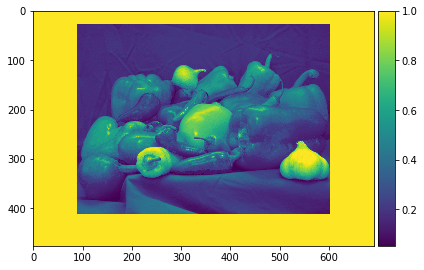

In [15]:
imshow(idct_image)

### Haar Wavelet Image Compression

In [16]:
titles = ['Approximation', 'Horizontal Detail', 'Vertical Detail', 'Diagonal Detail']
coeffs2 = pywt.dwt2(grey_image, 'haar')
LL, (LH, HL, HH) = coeffs2

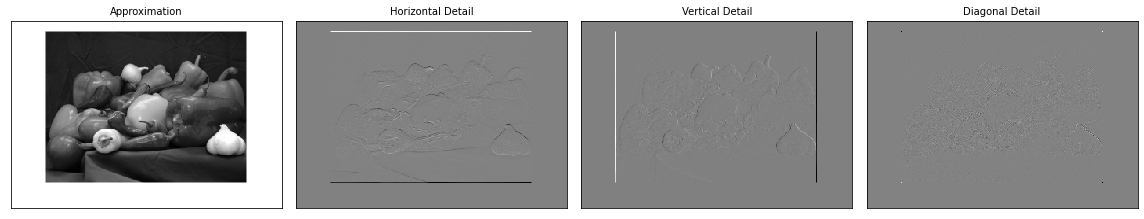

In [17]:
fig = plt.figure(figsize=(16, 4))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation = "nearest", cmap = plt.cm.gray)
  ax.set_title(titles[i], fontsize = 10)
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()
plt.show()

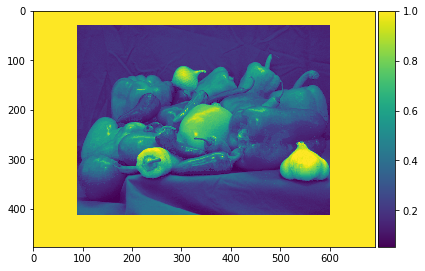

In [18]:
hwtic = pywt.idwt2(coeffs2, 'haar')
imshow(hwtic)

### Slant and Walsh-Hadamard Transform

In [19]:
from sympy import fwht

In [20]:
image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [21]:
for i in range(len(image)):
  for j in range(len(image[i])):
    image[i][j] = fwht(image[i][j])

In [22]:
image

array([[[252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        ...,
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0]],

       [[252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        ...,
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0]],

       [[252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        ...,
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0]],

       ...,

       [[252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        ...,
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0]],

       [[252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        ...,
        [252,   0,   0,   0],
        [252,   0,   0,   0],
        [252,   0,   0,   0]],

       [[252

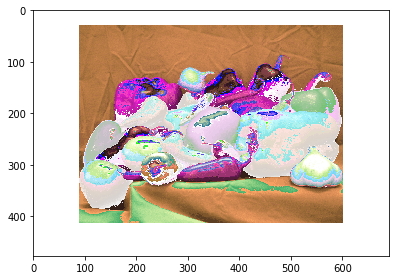

In [23]:
imshow(image)

## PART B

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow

In [25]:
img = cv2.imread('Vegetable Image.png')

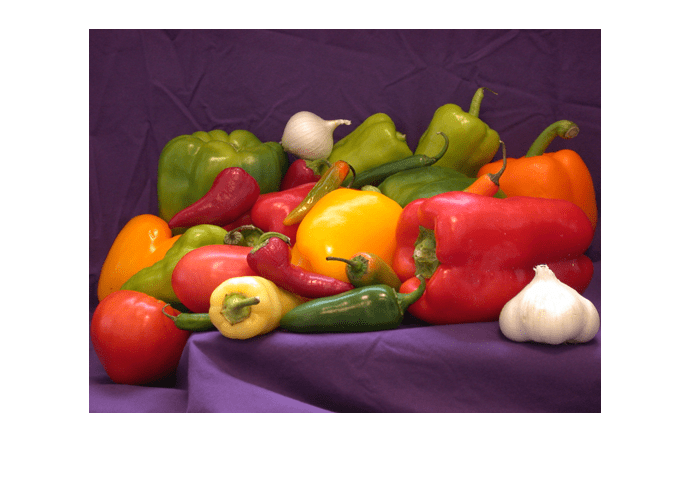

In [26]:
cv2_imshow(img)

### Smoothing and weighted average

In [27]:
averageBlur = cv2.blur(img,(5,5))

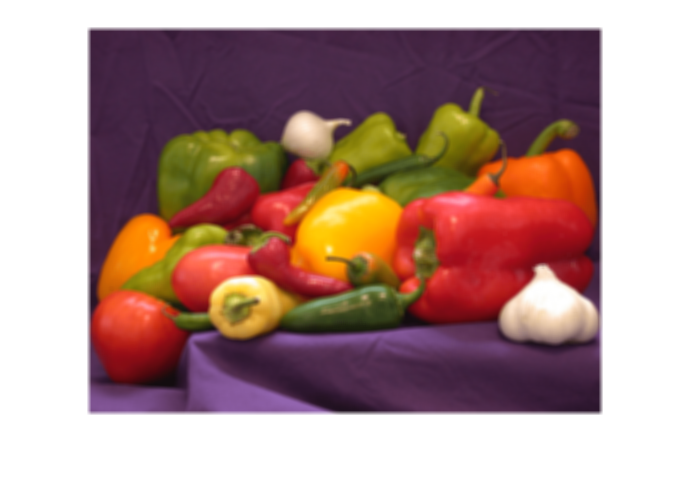

In [28]:
cv2_imshow(averageBlur)

### Median Filter

In [29]:
median = cv2.medianBlur(img,5)

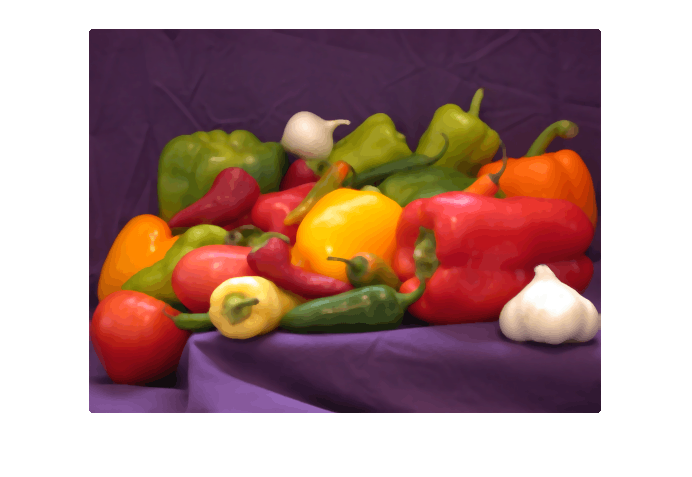

In [30]:
cv2_imshow(median)

### Laplacian filter

In [31]:
laplace = cv2.Laplacian(img, cv2.CV_64F)

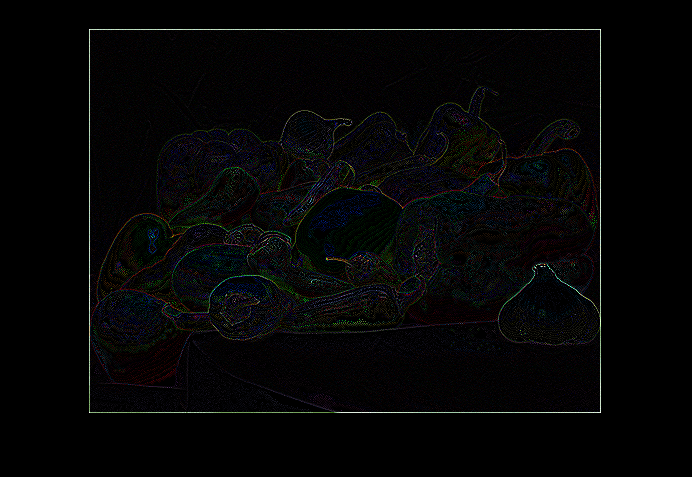

In [32]:
cv2_imshow(laplace)

### Composite masking filter

In [33]:
from PIL import Image, ImageDraw, ImageFilter

In [34]:
im1 = Image.open('Vegetable Image.png')
im2 = Image.open('bg.jpg').resize(im1.size)

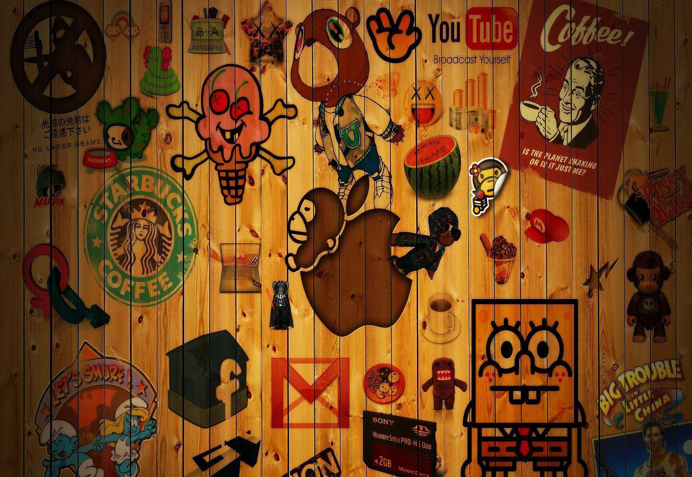

In [35]:
im2

In [36]:
mask = Image.new("L", im1.size, 128)
im = Image.composite(im1, im2, mask)

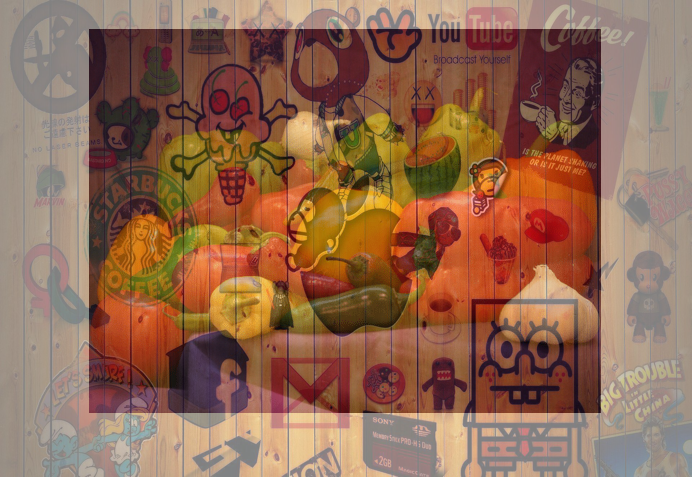

In [37]:
im

### Un-sharp masking filter

In [38]:
gauss = cv2. GaussianBlur(img,(7,7),0)
unsharp_image = cv2.addWeighted(img, 2, gauss, -1, 0)

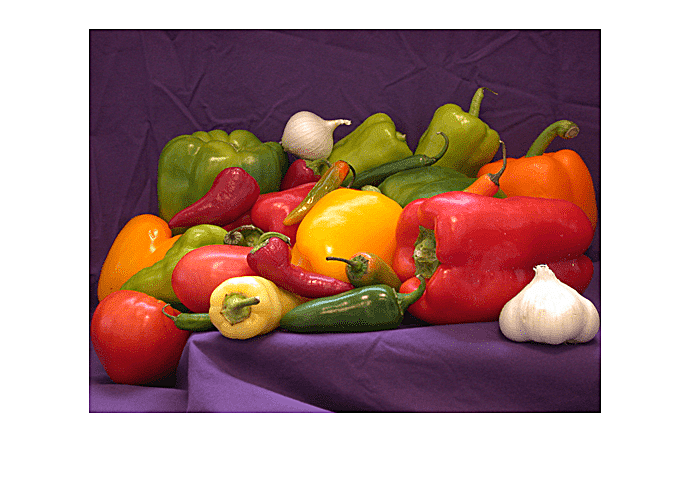

In [39]:
cv2_imshow(unsharp_image)

### High boost filter

In [40]:
def highBoostFiltering(image,boost_factor):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resultant_image = image.copy()
  for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
      blur_factor = (image[i-1, j-1] + image[i-1, j] - image[i-1, j+1] + image[i, j-1] + image[i, j] + image[i, j+1] + image[i+1, j+1] + image[i+1, j] + image[i+1, j+1])/9
      mask = boost_factor*image[i, j] - blur_factor
      resultant_image[i, j] = image[i, j] + mask

  return resultant_image

output = highBoostFiltering(img, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


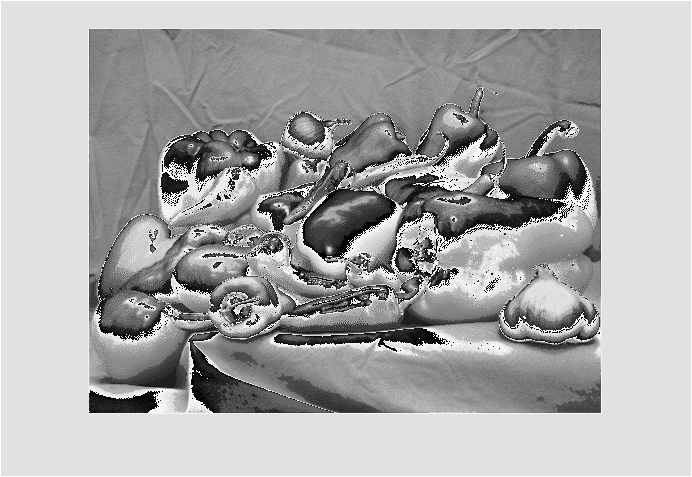

In [41]:
cv2_imshow(output)

### Shobel filter

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img0 = cv2.GaussianBlur(gray,(3,3),0)

sobelx = cv2.Sobel(img0, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img0, cv2.CV_64F, 0, 1, ksize=5)

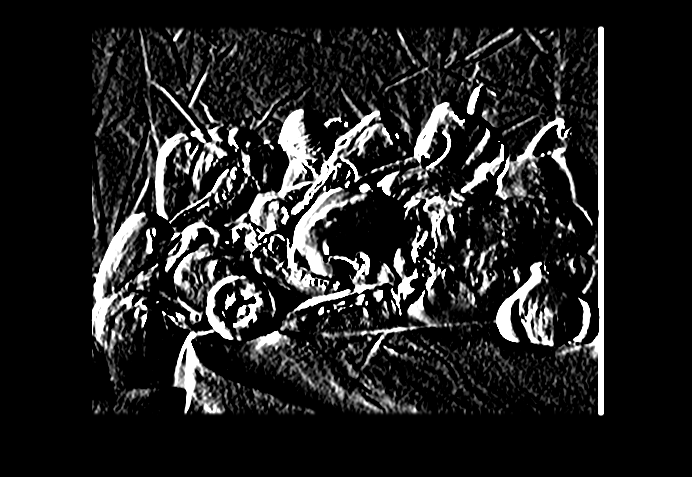

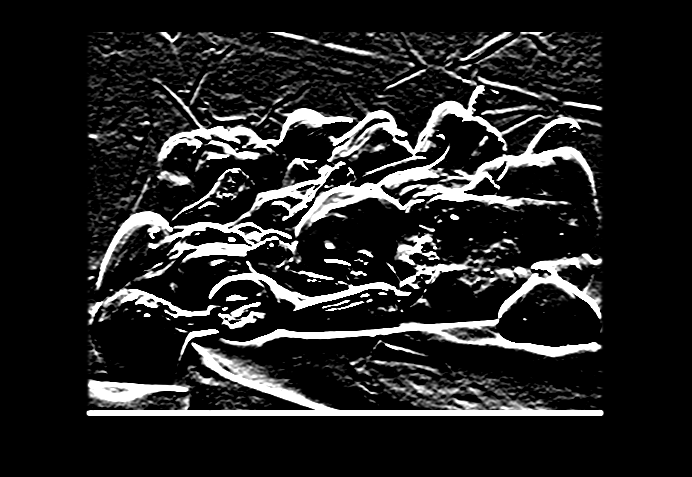

In [43]:
cv2_imshow(sobelx)
cv2_imshow(sobely)

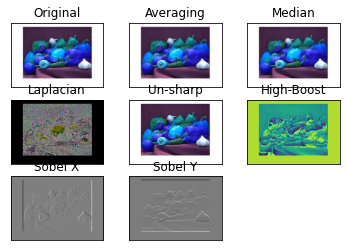

In [44]:
plt.subplot(3,3,1), plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2), plt.imshow(averageBlur)
plt.title('Averaging'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3), plt.imshow(median)
plt.title('Median'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,4), plt.imshow(laplace)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,5), plt.imshow(unsharp_image)
plt.title('Un-sharp'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,6), plt.imshow(output)
plt.title('High-Boost'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,7), plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,8), plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()